In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from draw3d import *

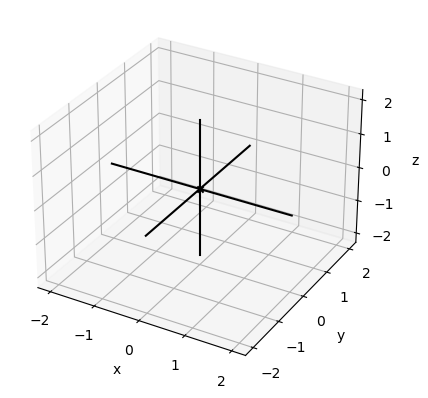

In [8]:
draw3d()

c:\Users\jiro-\work\Math-for-Programmers\Chapter 03\draw3d.py:19: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


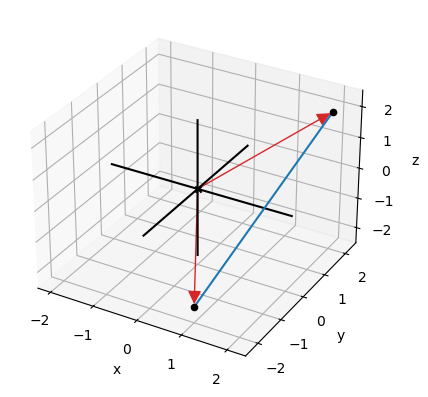

In [9]:
draw3d(
    Points3D((2, 2, 2), (1,-2,-2)),
    Arrow3D((2, 2, 2)),
    Arrow3D((1,-2,-2)), 
    Segment3D((2, 2, 2),(1,-2,-2)),
)

In [10]:
def add(*vectors):
    return tuple(map(sum,zip(*vectors)))

(-4.440892098500626e-16, -7.771561172376096e-16, 7.9999999999999964)


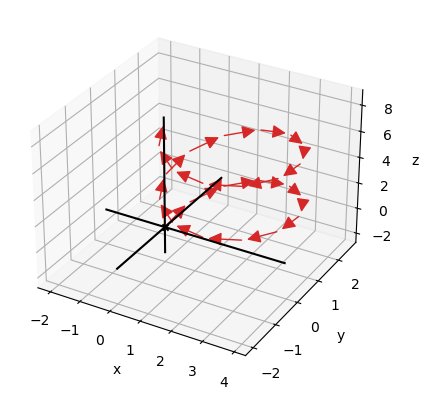

In [11]:
from math import sin, cos, pi
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

running_sum = (0,0,0)
arrows = []
for v in vs:
    next_sum = add(running_sum, v)
    arrows.append(Arrow3D(next_sum, running_sum))
    running_sum = next_sum
print(running_sum)
draw3d(*arrows)

In [12]:
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [13]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [14]:
def component(v,direction):
    return (dot(v,direction) / length(direction))

In [15]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [16]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [17]:
blues = matplotlib.cm.get_cmap('Blues')

In [18]:
def unit(v):
    return scale(1./length(v), v)

In [19]:
def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

In [20]:
from vectors import *
from draw2d import *

In [21]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

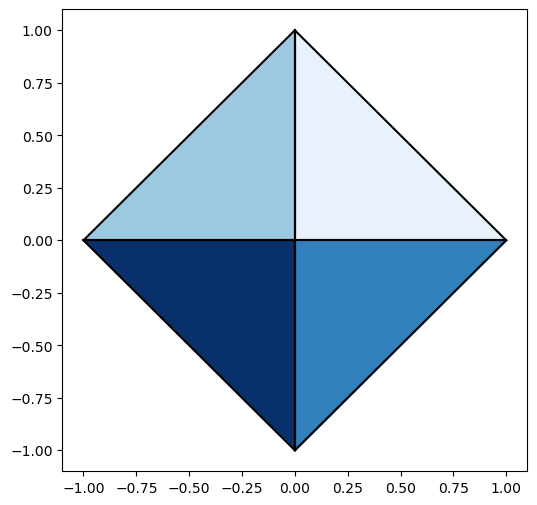

In [22]:
render(octahedron, color_map=blues, lines=black)

In [23]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split(
            [new_face for face in faces for new_face in split(face)],
            depth-1)

def sphere_approx(n):
    return rec_split(octahedron, n)


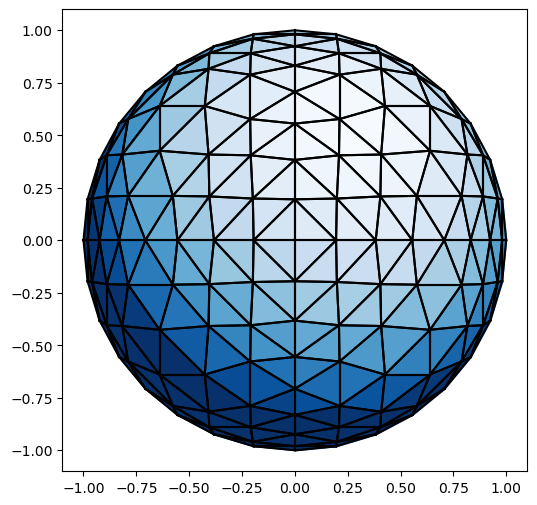

In [24]:
render(sphere_approx(3), lines="k")

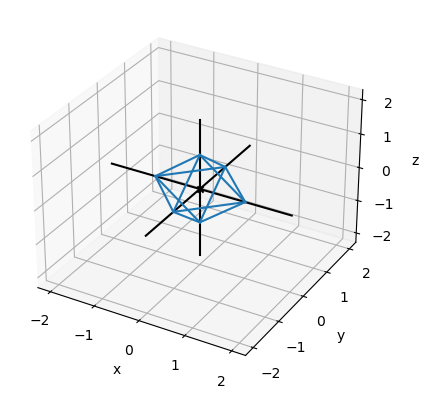

In [25]:
top= (0,0,1)
bottom = (0,0,-1)
xy_plane = [(1,0,0), (0,1,0), (-1,0,0), (0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
        [Segment3D(bottom,p) for p in xy_plane] +\
        [Segment3D(xy_plane[i], xy_plane[(i+1)%4]) for i in range(0,4)]
draw3d(*edges)